In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime
from math import ceil
from plotnine import * # use python's ggplot2

ts = pd.date_range('1/1/2020', periods = 366) # generate 2020 all year data, sum up 366 days
ts

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [2]:
ts = pd.Series(ts).apply(str) # convert Datetime into string
ts

0      2020-01-01 00:00:00
1      2020-01-02 00:00:00
2      2020-01-03 00:00:00
3      2020-01-04 00:00:00
4      2020-01-05 00:00:00
              ...         
361    2020-12-27 00:00:00
362    2020-12-28 00:00:00
363    2020-12-29 00:00:00
364    2020-12-30 00:00:00
365    2020-12-31 00:00:00
Length: 366, dtype: object

In [3]:
new = ts.str.split(" ", n = 1, expand = True) # extract YYYY-MM-DD date 
new


,0,1
0,2020-01-01,00:00:00
1,2020-01-02,00:00:00
2,2020-01-03,00:00:00
3,2020-01-04,00:00:00
4,2020-01-05,00:00:00
...,...,...
361,2020-12-27,00:00:00
362,2020-12-28,00:00:00
363,2020-12-29,00:00:00
364,2020-12-30,00:00:00


In [4]:
ts = new[0]
ts

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
361    2020-12-27
362    2020-12-28
363    2020-12-29
364    2020-12-30
365    2020-12-31
Name: 0, Length: 366, dtype: object

In [5]:
month = ts.apply(lambda x: int(x[5:7])) # slicing month from YYYY-MM-DD format
month

0       1
1       1
2       1
3       1
4       1
       ..
361    12
362    12
363    12
364    12
365    12
Name: 0, Length: 366, dtype: int64

In [6]:
mday = ts.apply(lambda x: int(x[8:10]))
mday

0       1
1       2
2       3
3       4
4       5
       ..
361    27
362    28
363    29
364    30
365    31
Name: 0, Length: 366, dtype: int64

In [7]:
def week_day(date):
    '''generate week days from YYYY-MM-DD format'''
    year, month, day = (int(x) for x in date.split('-'))   
    answer = datetime.date(year, month, day).weekday() 
    answer = int(answer) + 1
    return answer

weekdays = ts.apply(week_day)
weekdays

0      3
1      4
2      5
3      6
4      7
      ..
361    7
362    1
363    2
364    3
365    4
Name: 0, Length: 366, dtype: int64

In [8]:
df = pd.DataFrame({'date_time': ts, 'weekdays':weekdays,
              'mday':mday,'month': month,
              'val': np.random.randn(366)}) # val is random numbers

num_weekdays = {1:'Mon',2:'Tue',3: 'Wed',4:'Thu',5 :'Fri',6:'Sat', 7 : 'Sun'} # map between number and weekdays
num_mont = {1:'Jan',2:'Feb',3:'Mar',4:'Apr', 5: 'May',6:'Jun', 7:'Jul', 8:'Aug',
            9:'Sep',10:'Oct',11:'Nov', 12:'Dec'}

df['weekdays'] = df['weekdays'].map(num_weekdays)
df['month'] = df['month'].map(num_mont)

df

,date_time,weekdays,mday,month,val
0,2020-01-01,Wed,1,Jan,1.070136
1,2020-01-02,Thu,2,Jan,1.670276
2,2020-01-03,Fri,3,Jan,2.354699
3,2020-01-04,Sat,4,Jan,0.011706
4,2020-01-05,Sun,5,Jan,-0.722307
...,...,...,...,...,...
361,2020-12-27,Sun,27,Dec,0.373199
362,2020-12-28,Mon,28,Dec,-1.452238
363,2020-12-29,Tue,29,Dec,0.039686
364,2020-12-30,Wed,30,Dec,-1.577500


In [9]:
wdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] # set factor order level
wdays.reverse() # order reverse 
mont = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec']

def recode_ordered(array,level):
    '''recode string data to ordered factors
    '''
    cate = pd.api.types.CategoricalDtype(categories=level, ordered= True)
    array = array.astype(cate)
    return array

df['month'] = recode_ordered(df['month'], mont)
df['weekdays'] = recode_ordered(df['weekdays'], wdays)

def week_of_month(date):
    '''Returns the week of the month for the specified date.
    '''
    year, month, day = (int(x) for x in date.split('-'))   
    dt = datetime.date(year, month, day)
    first_day = dt.replace(day=1)
    adjusted_dom = dt.day + first_day.weekday()
    return int(ceil(adjusted_dom/7.0))

df['monthweek'] =  df['date_time'].apply(week_of_month)
df.to_csv('df.csv', index=False, header=True)
df   

,date_time,weekdays,mday,month,val,monthweek
0,2020-01-01,Wed,1,Jan,1.070136,1
1,2020-01-02,Thu,2,Jan,1.670276,1
2,2020-01-03,Fri,3,Jan,2.354699,1
3,2020-01-04,Sat,4,Jan,0.011706,1
4,2020-01-05,Sun,5,Jan,-0.722307,1
...,...,...,...,...,...,...
361,2020-12-27,Sun,27,Dec,0.373199,4
362,2020-12-28,Mon,28,Dec,-1.452238,5
363,2020-12-29,Tue,29,Dec,0.039686,5
364,2020-12-30,Wed,30,Dec,-1.577500,5


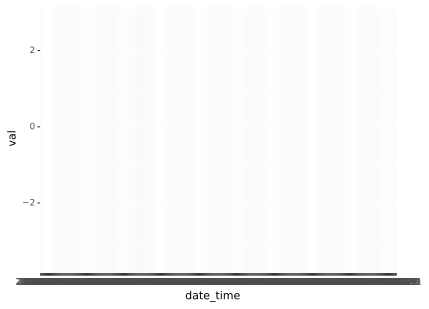

<ggplot: (332182815)>

In [11]:
(ggplot(df, aes(x="date_time", y="val"))+geom_line())

In [13]:
df['date_time']= pd.to_datetime(df['date_time'])

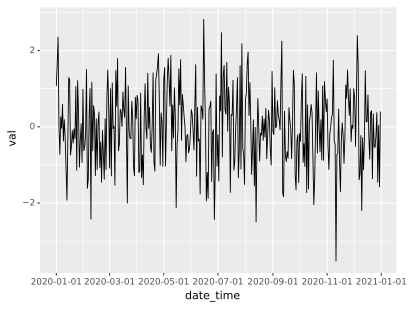

<ggplot: (286160930)>

In [14]:
(ggplot(df, aes(x="date_time", y="val"))+geom_line())

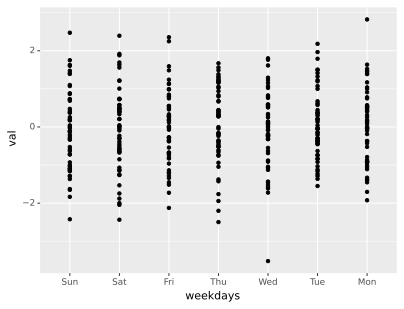

<ggplot: (333030714)>

In [15]:
(ggplot(df, aes(x="weekdays", y="val")) + geom_point())

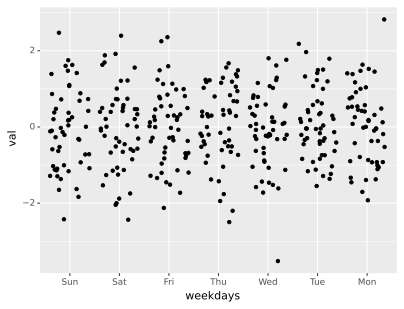

<ggplot: (333030178)>

In [16]:
(ggplot(df, aes(x="weekdays", y="val")) + geom_jitter())

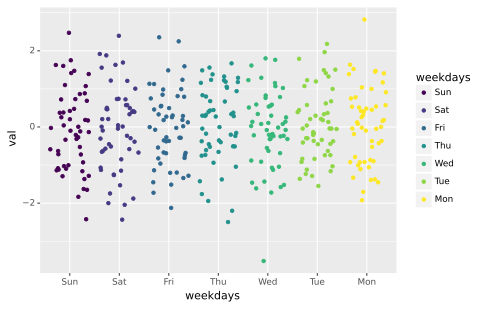

<ggplot: (331719310)>

In [19]:
(ggplot(df, aes(x="weekdays", y="val", colour="weekdays")) + geom_jitter())

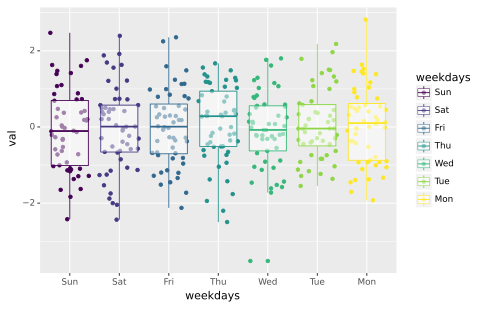

<ggplot: (277178652)>

In [21]:
(ggplot(df, aes(x="weekdays", y="val", colour="weekdays")) + geom_jitter() + geom_boxplot(alpha=0.5))